In [23]:
pip install scikit-learn matplotlib statsmodels seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset:  https://www.kaggle.com/datasets/teocalvo/tse-analytics

In [40]:
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importando Dataframe e inciando as análises

In [5]:
df = pd.read_csv("tse_analytics_partidos.csv")

In [8]:
df.head()

,SG_PARTIDO,NM_PARTIDO,DS_CARGO,SG_UF,txGenFeminino,totalGenFeminino,txCorRacaPreta,totalCorRacaPreta,txCorRacaPretaParda,totalCorRacaPretaParda,txCorRacaNaoBranca,totalCorRacaNaoBranca,totalBens,avgBens,avgBensNotZero,txEstadoCivilCasado,txEstadoCivilSolteiro,txEstadoCivilSeparadoDivorciado,avgIdade,totalCandidaturas
0,AGIR,AGIR,GERAL,BR,0.341580,2499,0.138737,1015,0.597868,4374,0.612083,4478,2.552211e+09,3.488534e+05,6.537427e+05,0.481411,0.387917,0.006698,47.263532,7316
1,AVANTE,AVANTE,GERAL,BR,0.335856,5502,0.131242,2150,0.605421,9918,0.623245,10210,3.423845e+09,2.090004e+05,3.498002e+05,0.481443,0.396899,0.006593,46.859785,16382
2,CIDADANIA,CIDADANIA,GERAL,BR,0.364150,1804,0.124950,619,0.528664,2619,0.547840,2714,8.454107e+08,1.706521e+05,2.855153e+05,0.492329,0.374647,0.011708,47.535325,4954
3,DC,DEMOCRACIA CRISTÃ,GERAL,BR,0.338054,2387,0.132276,934,0.578955,4088,0.596516,4212,1.390691e+09,1.969539e+05,3.746474e+05,0.503470,0.365529,0.007081,47.548223,7061
4,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,GERAL,BR,0.334551,14749,0.094202,4153,0.492129,21696,0.507168,22359,2.446151e+13,5.548590e+08,8.053703e+08,0.526607,0.351676,0.008325,47.761489,44086


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SG_PARTIDO                       2692 non-null   object 
 1   NM_PARTIDO                       2692 non-null   object 
 2   DS_CARGO                         2692 non-null   object 
 3   SG_UF                            2692 non-null   object 
 4   txGenFeminino                    2692 non-null   float64
 5   totalGenFeminino                 2692 non-null   int64  
 6   txCorRacaPreta                   2692 non-null   float64
 7   totalCorRacaPreta                2692 non-null   int64  
 8   txCorRacaPretaParda              2692 non-null   float64
 9   totalCorRacaPretaParda           2692 non-null   int64  
 10  txCorRacaNaoBranca               2692 non-null   float64
 11  totalCorRacaNaoBranca            2692 non-null   int64  
 12  totalBens           

In [10]:
df.isnull().sum()

SG_PARTIDO                         0
NM_PARTIDO                         0
DS_CARGO                           0
SG_UF                              0
txGenFeminino                      0
totalGenFeminino                   0
txCorRacaPreta                     0
totalCorRacaPreta                  0
txCorRacaPretaParda                0
totalCorRacaPretaParda             0
txCorRacaNaoBranca                 0
totalCorRacaNaoBranca              0
totalBens                          0
avgBens                            0
avgBensNotZero                     0
txEstadoCivilCasado                0
txEstadoCivilSolteiro              0
txEstadoCivilSeparadoDivorciado    0
avgIdade                           0
totalCandidaturas                  0
dtype: int64

In [12]:
df.describe()

,txGenFeminino,totalGenFeminino,txCorRacaPreta,totalCorRacaPreta,txCorRacaPretaParda,totalCorRacaPretaParda,txCorRacaNaoBranca,totalCorRacaNaoBranca,totalBens,avgBens,avgBensNotZero,txEstadoCivilCasado,txEstadoCivilSolteiro,txEstadoCivilSeparadoDivorciado,avgIdade,totalCandidaturas
count,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2.692000e+03,2.692000e+03,2.692000e+03,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000
mean,0.291612,232.233284,0.119283,77.658247,0.577941,359.555721,0.601745,370.601783,3.654148e+10,8.012795e+07,8.964521e+07,0.509619,0.373616,0.006207,47.690162,681.968796
std,0.179962,1046.554380,0.158730,342.567951,0.268124,1583.301648,0.270422,1630.185402,9.420240e+11,3.694630e+09,4.079770e+09,0.231247,0.233809,0.024782,5.581930,3047.910940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,23.336683,1.000000
25%,0.181818,2.000000,0.000000,0.000000,0.411700,4.000000,0.435066,4.000000,2.036660e+06,9.886222e+04,1.925809e+05,0.402944,0.223083,0.000000,45.407177,7.000000
50%,0.334401,12.000000,0.087586,4.000000,0.606898,22.500000,0.636364,24.000000,1.410497e+07,1.974438e+05,3.183823e+05,0.506061,0.357762,0.000000,47.411822,48.000000
75%,0.360302,118.250000,0.147382,36.000000,0.776676,213.250000,0.809524,219.250000,7.759729e+07,5.014783e+05,6.566719e+05,0.637634,0.495210,0.006397,50.138896,348.000000
max,1.000000,14749.000000,1.000000,5247.000000,1.000000,21696.000000,1.000000,22359.000000,2.446151e+13,1.910020e+11,2.107609e+11,1.000000,1.000000,0.500000,81.000000,44086.000000


# Tratamento de dados

In [16]:
print(df.dtypes)

SG_PARTIDO                          object
NM_PARTIDO                          object
DS_CARGO                            object
SG_UF                               object
txGenFeminino                      float64
totalGenFeminino                     int64
txCorRacaPreta                     float64
totalCorRacaPreta                    int64
txCorRacaPretaParda                float64
totalCorRacaPretaParda               int64
txCorRacaNaoBranca                 float64
totalCorRacaNaoBranca                int64
totalBens                          float64
avgBens                            float64
avgBensNotZero                     float64
txEstadoCivilCasado                float64
txEstadoCivilSolteiro              float64
txEstadoCivilSeparadoDivorciado    float64
avgIdade                           float64
totalCandidaturas                    int64
dtype: object


In [49]:
#pré-processamento para a matriz de correlçação
label_encoder = LabelEncoder()
df['SG_PARTIDO_Encoded'] = label_encoder.fit_transform(df['SG_PARTIDO'])




In [50]:
df_encoded = pd.get_dummies(df, columns=['SG_PARTIDO', 'NM_PARTIDO', 'DS_CARGO', 'SG_UF'], drop_first=True)

In [53]:
#Definir as variáveis independentes (X) e dependente (y)
X = df[['txGenFeminino', 'txCorRacaPreta', 'txCorRacaPretaParda', 'avgIdade', 'SG_PARTIDO_Encoded']]
y = df['totalBens']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Mostrar o resumo do modelo de regressão
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              totalBens   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.944
Date:                Mon, 16 Sep 2024   Prob (F-statistic):             0.0839
Time:                        20:09:46   Log-Likelihood:                -78036.
No. Observations:                2692   AIC:                         1.561e+05
Df Residuals:                    2686   BIC:                         1.561e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.851e+10   1

In [54]:

residuos = model.resid

In [57]:
r_squared = model.rsquared
p_values = model.pvalues
coefficients = model.params


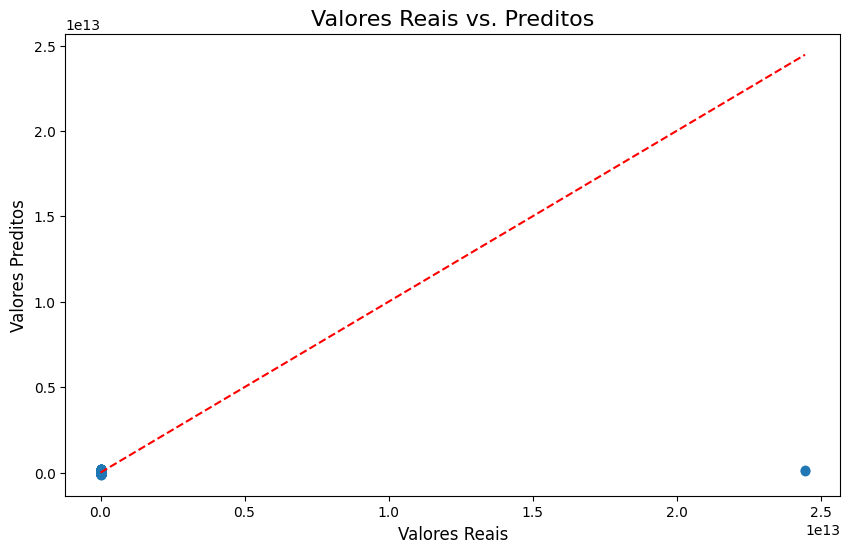

In [67]:
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Linha de igualdade
plt.title('Valores Reais vs. Preditos', fontsize=16)
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Preditos', fontsize=12)
plt.show()

Text(0.5, 0, 'Coeficientes')

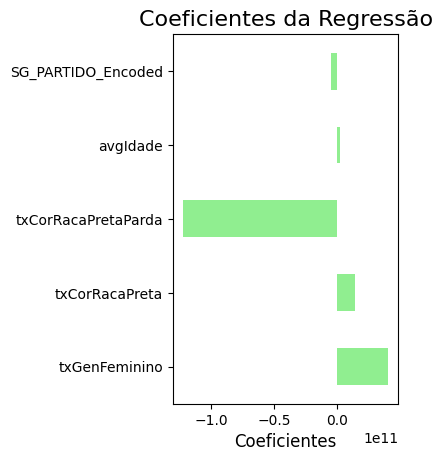

In [61]:
plt.subplot(1, 2, 1)
coefficients.drop('const').plot(kind='barh', color='lightgreen')
plt.title('Coeficientes da Regressão', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)

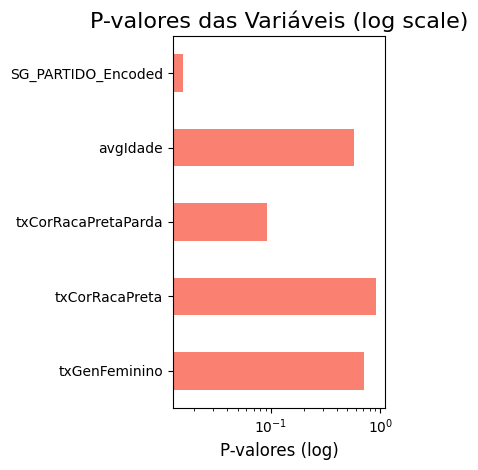

In [66]:
plt.subplot(1, 2, 2)
p_values.drop('const').plot(kind='barh', color='salmon')
plt.title('P-valores das Variáveis (log scale)', fontsize=16)
plt.xlabel('P-valores (log)', fontsize=12)
plt.xscale('log')
plt.tight_layout()
plt.show()

In [44]:
# Descriptive statistics for selected columns
estatistica_descritiva = df[['txGenFeminino', 'txCorRacaPreta', 'txCorRacaPretaParda', 
                        'totalBens', 'avgBens', 'avgIdade']].describe()

print(estatistica_descritiva)

       txGenFeminino  txCorRacaPreta  txCorRacaPretaParda     totalBens  \
count    2692.000000     2692.000000          2692.000000  2.692000e+03   
mean        0.291612        0.119283             0.577941  3.654148e+10   
std         0.179962        0.158730             0.268124  9.420240e+11   
min         0.000000        0.000000             0.000000  0.000000e+00   
25%         0.181818        0.000000             0.411700  2.036660e+06   
50%         0.334401        0.087586             0.606898  1.410497e+07   
75%         0.360302        0.147382             0.776676  7.759729e+07   
max         1.000000        1.000000             1.000000  2.446151e+13   

            avgBens     avgIdade  
count  2.692000e+03  2692.000000  
mean   8.012795e+07    47.690162  
std    3.694630e+09     5.581930  
min    0.000000e+00    23.336683  
25%    9.886222e+04    45.407177  
50%    1.974438e+05    47.411822  
75%    5.014783e+05    50.138896  
max    1.910020e+11    81.000000  


<Figure size 640x480 with 0 Axes>

# Visualização de Dados

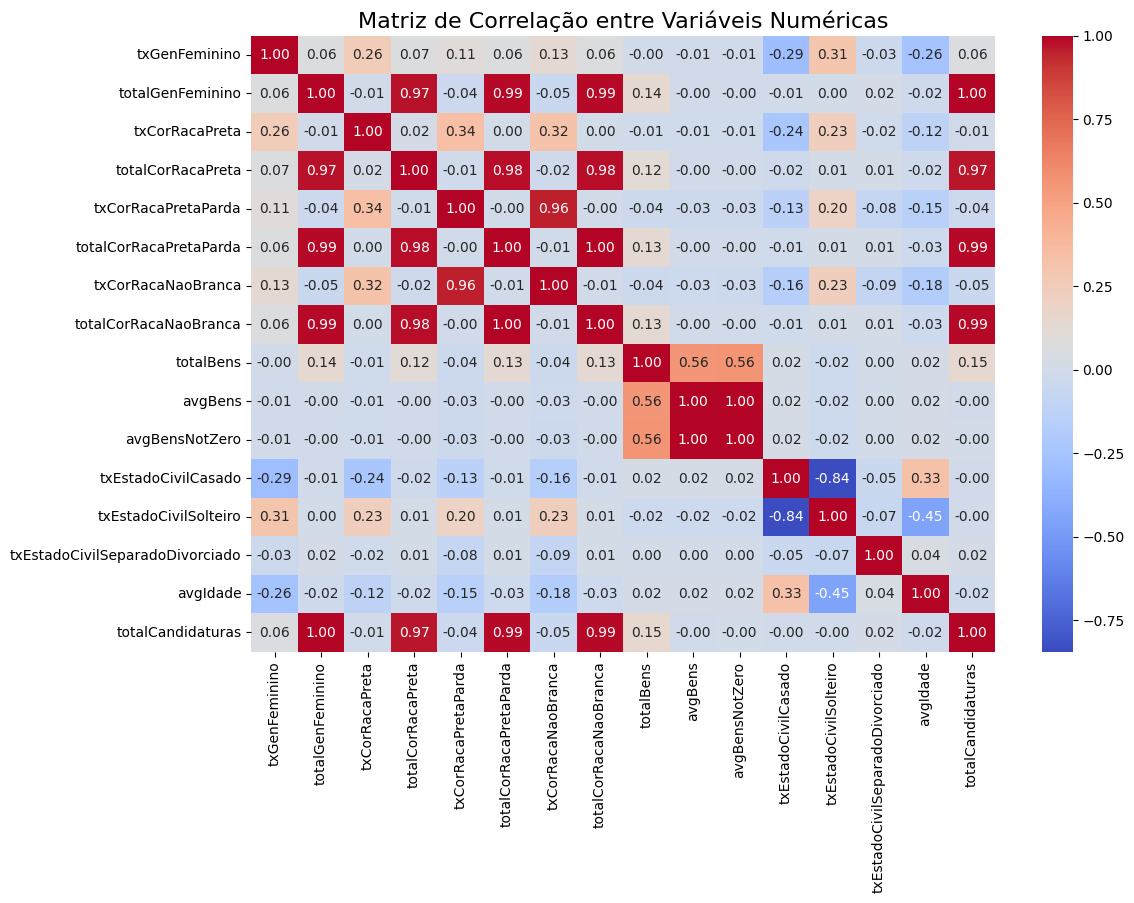

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

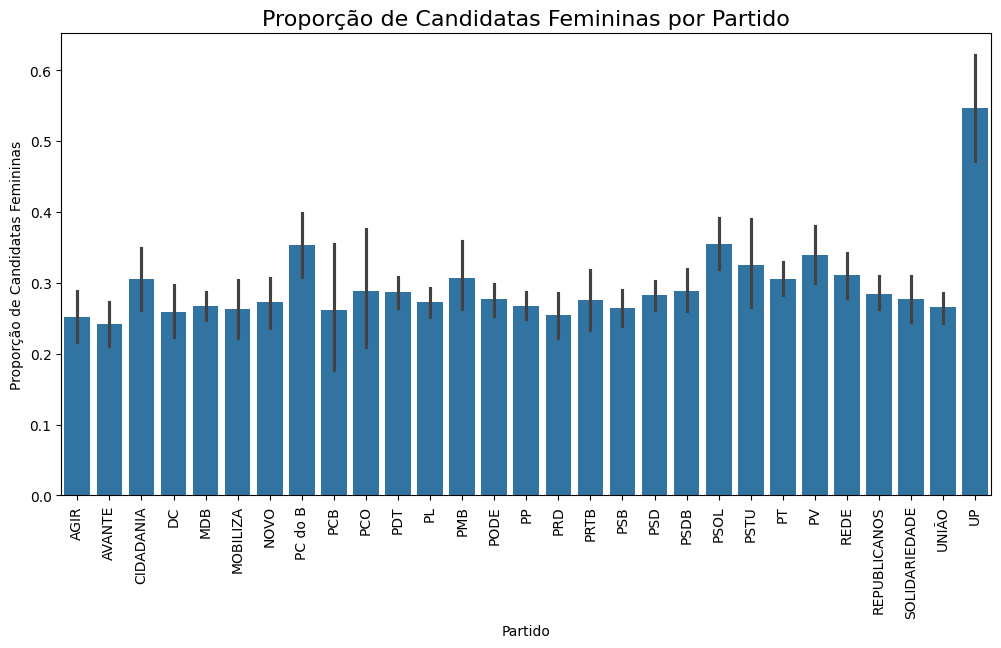

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='SG_PARTIDO', y='txGenFeminino', data=df)
plt.title('Proporção de Candidatas Femininas por Partido', fontsize=16)
plt.xlabel('Partido')
plt.ylabel('Proporção de Candidatas Femininas')
plt.xticks(rotation=90)
plt.show()

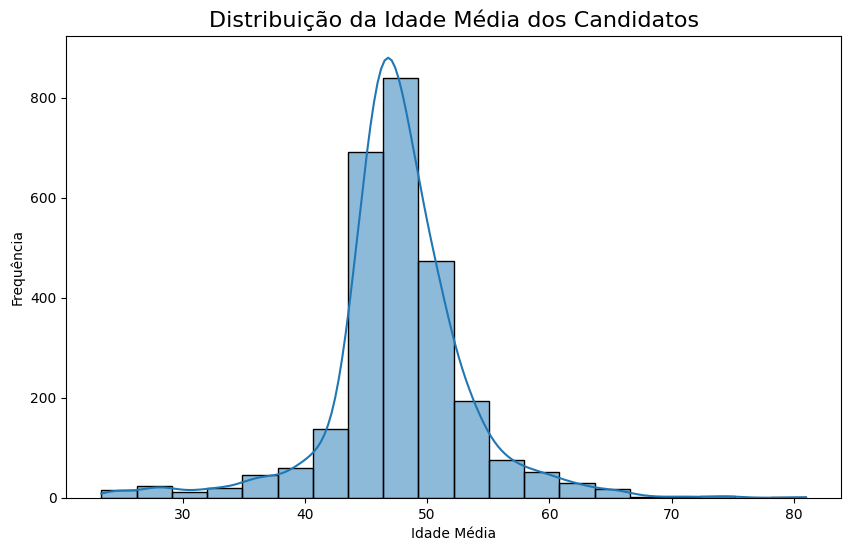

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avgIdade'], bins=20, kde=True)
plt.title('Distribuição da Idade Média dos Candidatos', fontsize=16)
plt.xlabel('Idade Média')
plt.ylabel('Frequência')
plt.show()

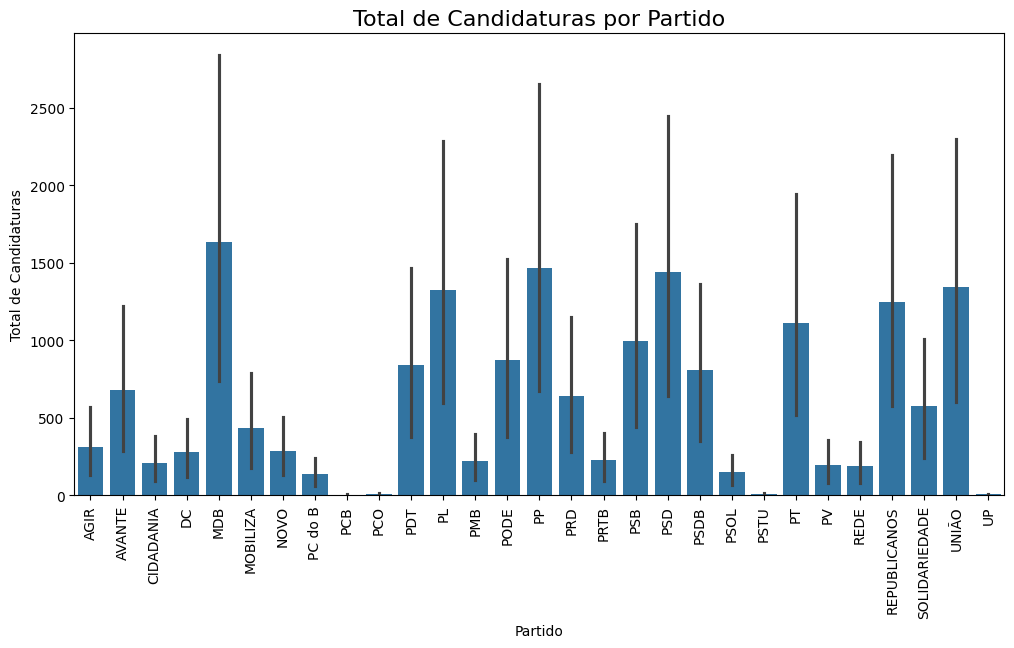

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='SG_PARTIDO', y='totalCandidaturas', data=df)
plt.title('Total de Candidaturas por Partido', fontsize=16)
plt.xlabel('Partido')
plt.ylabel('Total de Candidaturas')
plt.xticks(rotation=90)
plt.show()

In [68]:
df.to_csv('tse-analises.csv',index=False)